# Module 1 - Introduction to Time Series 

Elena Pesavento | Emory University

## Deterministic Trend

We start by importing the data and using the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

Let us try to load the data contained in GDP.csv and plot it.

In [2]:
# Import the data
data = pd.read_csv('GDP.csv')
data.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


Let us now plot the time series that we have loaded

Index(['DATE', 'GDP'], dtype='object')


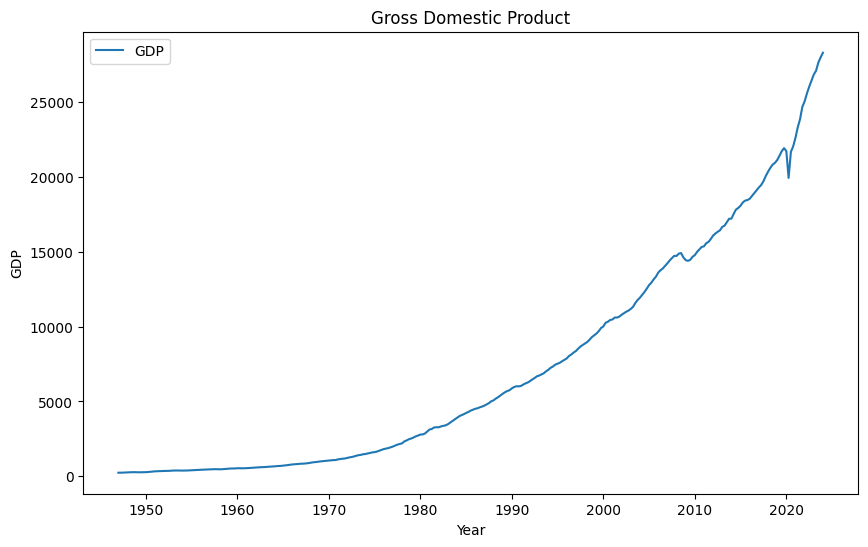

In [3]:
# Verify the column names
print(data.columns)

# Ensure 'DATE' column is in datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Plot the data with the correct column names
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['GDP'], label='GDP') 

plt.title('Gross Domestic Product')
plt.xlabel('Year')
plt.ylabel('GDP')

# Set x-axis ticks to be every 10 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.show()

Let us estimate a simple model with deterministic trend using the GDP data. We run the following model. $$GDP_t = c + \beta t + u_t$$


In [4]:
# Run a simple OLS regression with deterministic trend
data['Time'] = np.arange(len(data))
data['Constant'] = 1

model = sm.OLS(data['GDP'], data[['Constant', 'Time']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1973.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          1.03e-135
Time:                        14:57:26   Log-Likelihood:                -2884.3
No. Observations:                 309   AIC:                             5773.
Df Residuals:                     307   BIC:                             5780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -4763.0379    311.942    -15.269      0.0

Let us now try to plot something else. Consider predicting the predicted values and plotting that against the actual and the residual

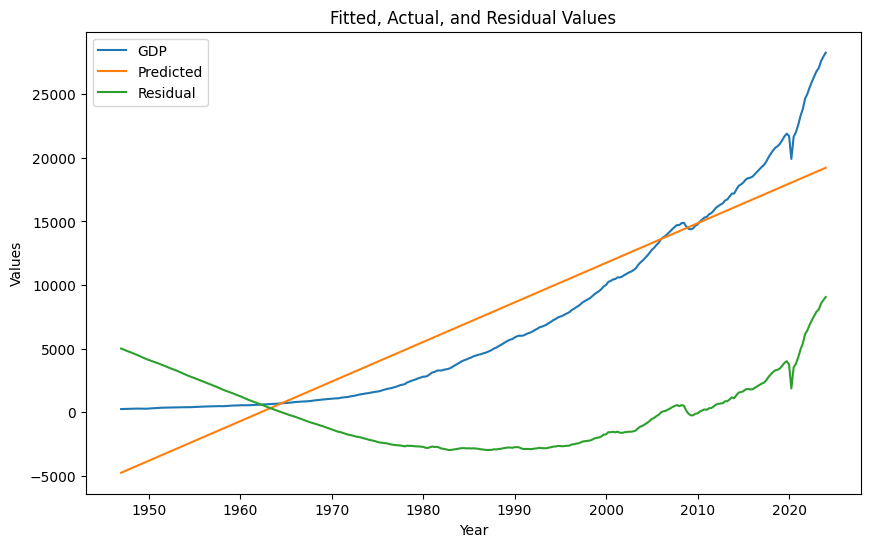

In [5]:
# Compute the Fitted/ Predicted Values
data['Predicted'] = results.predict(data[['Constant', 'Time']])

# Compute the Residuals
data['Residual'] = data['GDP'] - data['Predicted']

# Plot the actual data, fitted value, and residuals over time
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['GDP'], label='GDP')
plt.plot(data['DATE'], data['Predicted'], label='Predicted')
plt.plot(data['DATE'], data['Residual'], label='Residual')
plt.title('Fitted, Actual, and Residual Values')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


Let us now do the same but consider a quadratic deterministic trend model as below $$GDP_t = c + \beta_1 t+ \beta_2 t^2+ u_t$$



In [6]:
# Estimate a quadratic deterministic trend model
data['Time_sq'] = data['Time']**2

model = sm.OLS(data['GDP'], data[['Constant', 'Time', 'Time_sq']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.683e+04
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:57:26   Log-Likelihood:                -2395.0
No. Observations:                 309   AIC:                             4796.
Df Residuals:                     306   BIC:                             4807.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant    1174.2928     95.795     12.258      0.0

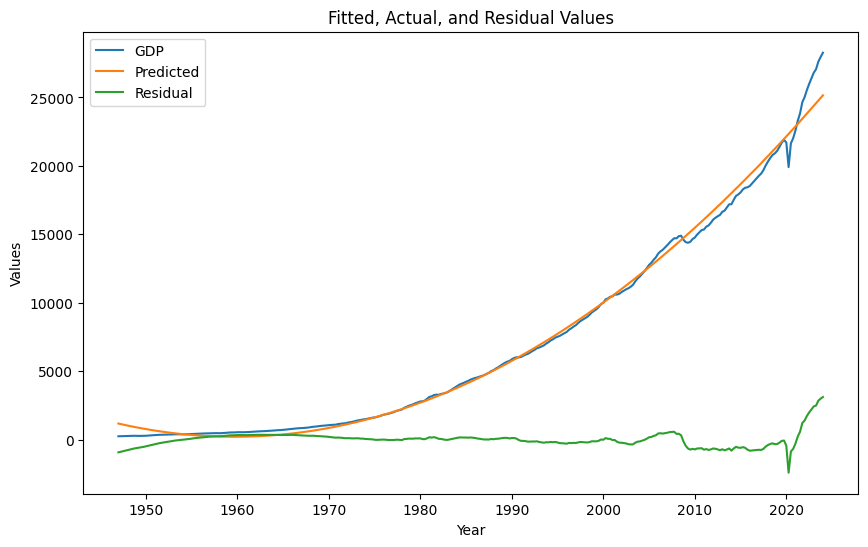

In [7]:
# Predict the values using the quadratic model
data['Predicted_quad'] = results.predict(data[['Constant', 'Time', 'Time_sq']])
data['Residual_quad'] = data['GDP'] - data['Predicted_quad']

# Plot the actual data, fitted value, and residuals over time
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['GDP'], label='GDP')
plt.plot(data['DATE'], data['Predicted_quad'], label='Predicted')
plt.plot(data['DATE'], data['Residual_quad'], label='Residual')
plt.title('Fitted, Actual, and Residual Values')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

## Breaks

Let us load the USD-Japan Exchange Rate. For teaching purposes, I have narrowed the scope to monthly data from January 1971 to September 2006. 

In [8]:
# Load the data
er = pd.read_csv('EXJPUS.csv')
er['DATE'] = pd.to_datetime(er['DATE'])
er.head()

,DATE,EXJPUS
0,1971-01-01,358.0200
1,1971-02-01,357.5450
2,1971-03-01,357.5187
3,1971-04-01,357.5032
4,1971-05-01,357.4130


The values of time series objects are somewhat high in magnitude. Moreover, some data may be quite volatile. To alleviate these concerns partially, one good practice is to take the natural log of the data

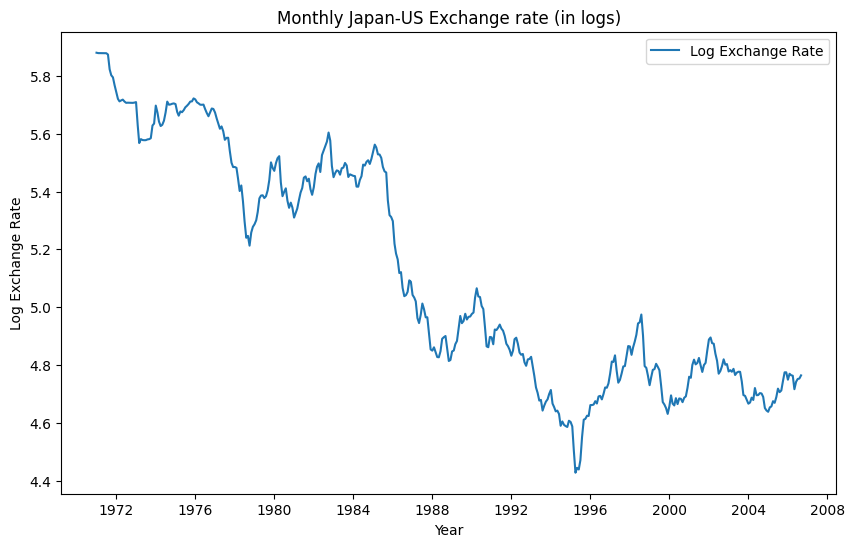

In [9]:
# Take the log of the exchange rate
er['Log_ER'] = np.log(er['EXJPUS'])

# Plot the exchange rate
plt.figure(figsize=(10, 6))
plt.plot(er['DATE'], er['Log_ER'], label='Log Exchange Rate')
plt.title('Monthly Japan-US Exchange rate (in logs)')
plt.xlabel('Year')
plt.ylabel('Log Exchange Rate')
plt.legend()
plt.show()

Let us estimate a simple linear trend. Essentially, this follows $$yen_t = c + \beta t + u_t$$

In [10]:
# Run a simple OLS regression with deterministic trend
er['Time'] = np.arange(len(er))
er['Constant'] = 1

model = sm.OLS(er['Log_ER'], er[['Constant', 'Time']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log_ER   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     2096.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          7.93e-167
Time:                        14:57:27   Log-Likelihood:                 165.73
No. Observations:                 429   AIC:                            -327.5
Df Residuals:                     427   BIC:                            -319.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       5.7447      0.016    361.595      0.0

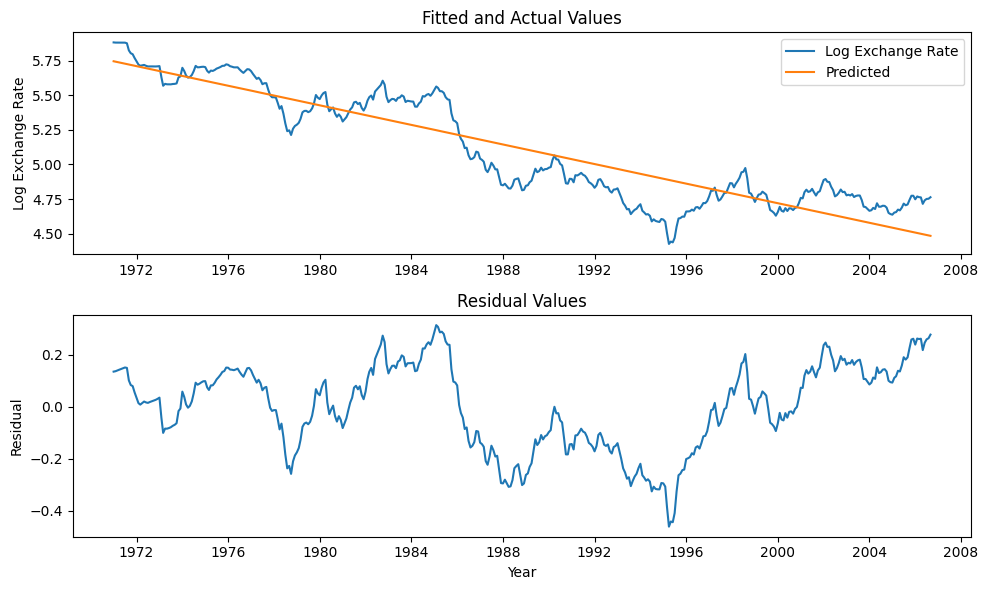

In [11]:
# Plot the actual data, fitted value, and residuals over time in two graphs
er['Predicted'] = results.predict(er[['Constant', 'Time']])
er['Residual'] = er['Log_ER'] - er['Predicted']

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(er['DATE'], er['Log_ER'], label='Log Exchange Rate')
ax[0].plot(er['DATE'], er['Predicted'], label='Predicted')
ax[0].set_title('Fitted and Actual Values')
ax[0].set_ylabel('Log Exchange Rate')
ax[0].legend()

ax[1].plot(er['DATE'], er['Residual'], label='Residual')
ax[1].set_title('Residual Values')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Residual')
plt.tight_layout()
plt.show()


It looks like there is a break in the trend around 1986. Before mid 1986 the trend is flatter and it is decreasing after that. Let us define a dummy variable $D$ that takes a value of 0 before December 1985 and 1 after December 1985. We essentially want to run the regression $$yen_t = c + \beta_1 D_t + \beta_2 t + u_t$$

In [12]:
# Define a dummy variable for the period after December 1985
er['Post_85'] = (er['DATE'] > '1985-12-31').astype(int)

# Run a simple OLS regression with deterministic trend and dummy variable
model = sm.OLS(er['Log_ER'], er[['Constant', 'Post_85','Time']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log_ER   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2354.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          5.67e-231
Time:                        14:57:27   Log-Likelihood:                 318.55
No. Observations:                 429   AIC:                            -631.1
Df Residuals:                     426   BIC:                            -618.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       5.6766      0.012    489.406      0.0

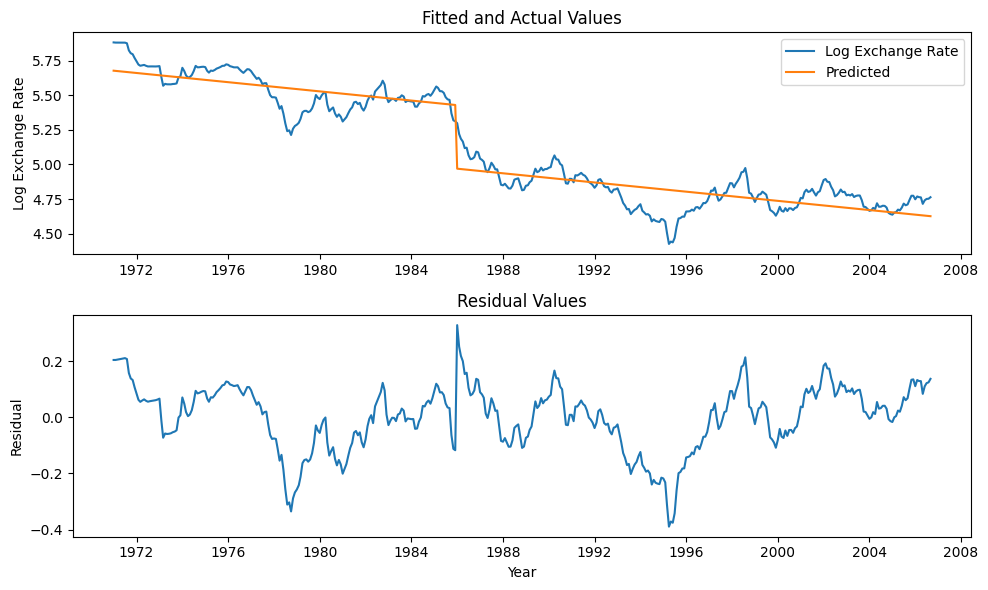

In [13]:
# Plot the actual data, fitted value, and residuals over time in two graphs
er['Predicted'] = results.predict(er[['Constant', 'Post_85','Time']])
er['Residual'] = er['Log_ER'] - er['Predicted']

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(er['DATE'], er['Log_ER'], label='Log Exchange Rate')
ax[0].plot(er['DATE'], er['Predicted'], label='Predicted')
ax[0].set_title('Fitted and Actual Values')
ax[0].set_ylabel('Log Exchange Rate')
ax[0].legend()

ax[1].plot(er['DATE'], er['Residual'], label='Residual')
ax[1].set_title('Residual Values')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Residual')
plt.tight_layout()
plt.show()


We can use the same idea to allow for the possibility of a change in the slope. We call this an interaction term! $(D_t \cdot t)$
$$yen_t = c + \beta_1 D_t + \beta_2 t + \beta_3 (D_t \cdot t) + u_t$$


In [14]:
# Create an interaction term between time and the dummy variable
er['Time_Post_85'] = er['Time'] * er['Post_85']

# Run a simple OLS regression with deterministic trend and dummy variable
model = sm.OLS(er['Log_ER'], er[['Constant', 'Post_85','Time', 'Time_Post_85']])
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Log_ER   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1679.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          3.64e-235
Time:                        14:57:27   Log-Likelihood:                 332.34
No. Observations:                 429   AIC:                            -656.7
Df Residuals:                     425   BIC:                            -640.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Constant         5.7417      0.017    345.225   

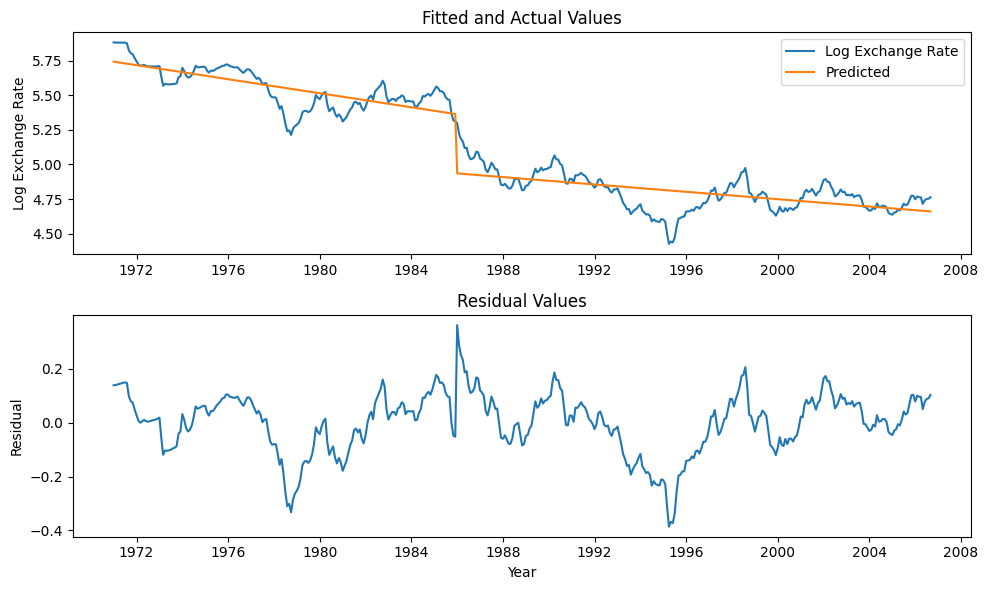

In [15]:
# Plot the actual data, fitted value, and residuals over time in two graphs
er['Predicted'] = results.predict(er[['Constant', 'Post_85','Time', 'Time_Post_85']])
er['Residual'] = er['Log_ER'] - er['Predicted']

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(er['DATE'], er['Log_ER'], label='Log Exchange Rate')
ax[0].plot(er['DATE'], er['Predicted'], label='Predicted')
ax[0].set_title('Fitted and Actual Values')
ax[0].set_ylabel('Log Exchange Rate')
ax[0].legend()

ax[1].plot(er['DATE'], er['Residual'], label='Residual')
ax[1].set_title('Residual Values')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Residual')
plt.tight_layout()
plt.show()

Let's try and run a simple Chow's test! To do this, let us test the null hypothesis of a structural break in December 1985

In [17]:
# Run a Chow test to test for structural break

# Define the two subsamples
er_pre = er[er['DATE'] <= '1985-12-31']
er_post = er[er['DATE'] > '1985-12-31']

# Run the regression for the two subsamples
model_pre = sm.OLS(er_pre['Log_ER'], er_pre[['Constant', 'Time']])
results_pre = model_pre.fit()

model_post = sm.OLS(er_post['Log_ER'], er_post[['Constant', 'Time']])
results_post = model_post.fit()

# Compute the sum of squared residuals for the two subsamples
SSR_pre = np.sum(results_pre.resid**2)
SSR_post = np.sum(results_post.resid**2)

# Compute the total sum of squared residuals
SSR_total = np.sum((er['Log_ER'] - np.mean(er['Log_ER']))**2)

# Compute the Chow test statistic
Chow = ((SSR_total - (SSR_pre + SSR_post)) / 2) / ((SSR_pre + SSR_post) / (len(er) - 4))
Chow


2518.029081609119